<a href="https://colab.research.google.com/github/dev-singh-chauhan/Elevate-Lab-T1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load and Explore Dataset**

In [5]:
import pandas as pd
#loading data set
df = pd.read_csv('/content/titanic data set.zip')
# perview data
print(df.head())
# overview data
print(df.info())
# Summary statistics for numerical columns
print(df.describe())





   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# **Handle missing Value**

In [7]:
print(df.isnull().sum()) #checking how many values are null each columns has

df['Age'] = df['Age'].fillna(df['Age'].median()) # fill age with avg./median

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop('Cabin', axis=1, inplace=True) # drop cabin column because it has too many missing values

print(df.isnull().sum()) #checking again if there is any null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Convert Values from catagorical to Numerical**

In [8]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True) # convert catagorical values to numerical values
print(df.head()) # perview data after converting catagorical values to numerical values

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

# **Normilize / standardize Numric Features**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']]) # normilize age and fare columns
print(df.head()) # perview data after normilize age and fare columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
1          PC 17599  0.786845     False       False       False  
2  STON/O2. 3101282 -0.488854     False       False        True  
3            113803  0.420730     Fals

# **Visualize & Remove Outliner**

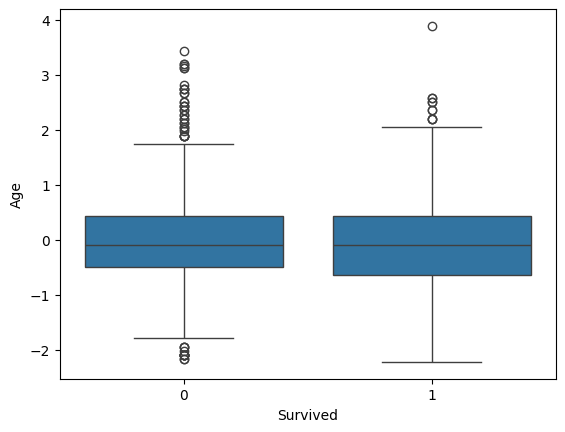

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Survived', y='Age', data=df) # visualize outliner in age column
plt.show()

# Remove Outliner from fair using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR